<a href="https://colab.research.google.com/github/josefernandezest98/training/blob/main/SAM/SAM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segment Anything Meta-AI (SAM)

## 1. SAM download and installation

In [1]:
!wget -p https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!pip install git+https://github.com/facebookresearch/segment-anything.git

--2023-09-04 18:27:13--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.25, 13.226.210.111, 13.226.210.78, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth’

dl.fbaipublicfiles. 100%[===================>]   2.39G   179MB/s    in 16s     

2023-09-04 18:27:30 (150 MB/s) - ‘dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]

FINISHED --2023-09-04 18:27:30--
Total wall clock time: 16s
Downloaded: 1 files, 2.4G in 16s (150 MB/s)
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-lnqjvnu8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip

## 2. Libraries

In [2]:
# usual
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

# SAM library
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

## 3. Functions

In [3]:
# Function: shows masks provided by SAM
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

## 4. Main

In [4]:
# Downloading Bamburgh castle picture
!wget https://raw.githubusercontent.com/josefernandezest98/training/main/SAM/bamburgh.jpg

--2023-09-04 18:27:58--  https://raw.githubusercontent.com/josefernandezest98/training/main/SAM/bamburgh.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63910 (62K) [image/jpeg]
Saving to: ‘bamburgh.jpg’

bamburgh.jpg        100%[===================>]  62.41K  --.-KB/s    in 0.007s  

2023-09-04 18:27:59 (8.27 MB/s) - ‘bamburgh.jpg’ saved [63910/63910]



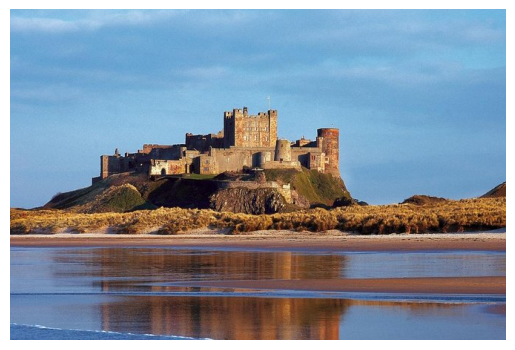

In [5]:
# Read of the image (Bamburgh Castle)
image = cv2.imread('bamburgh.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Showing the image
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
# Colab T GPU

sam_checkpoint = "dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
model_type = "vit_h"

cuda0 = torch.device('cuda:0')

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=cuda0)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [7]:
# SAM perform
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

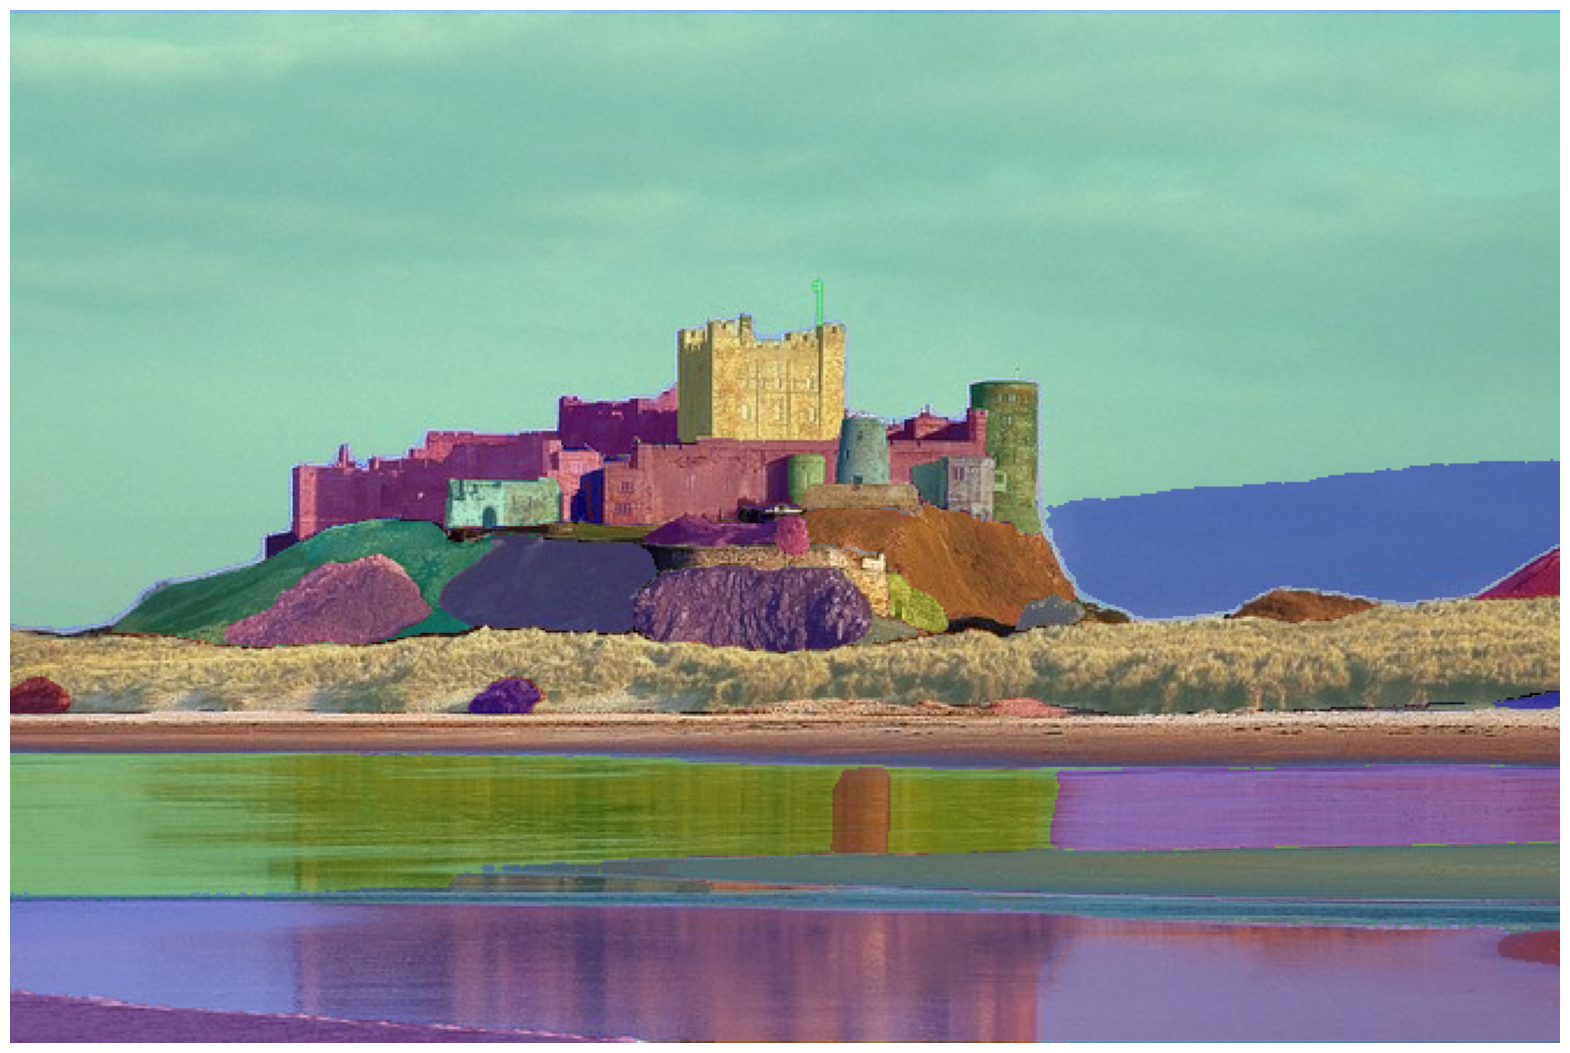

In [8]:
# Masks plot
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()



---



